# Case Study - Language Processing

Patterns within written text are not the same across all authors or languages. This allows linguists to study the language of origin.

In this study, we will examine the properties of individual books in a book collection from various authors and various languages.

More specifically, we will look at book lengths, number of unique words, and how these attributes cluster by language of authorship.

---
The collection for this study consists of four languages: **English**, **French**, **German** and **Portuguese**.

For each langauge, we have from one to four authors each, **13** authors in total.

For each author, we have from one to sixteen book, **102** books in total.

Some authors have appeared in several language categories because their books are available as translations in several languages.

The **goal of this study** is to write a function that given a string of text counts the number of times each unique word appears.

In [1]:
text = "This is my test text. We're keeping this text short to keep things manageable."

In [3]:
word_list = list(text.split())

word_list

['This',
 'is',
 'my',
 'test',
 'text.',
 "We're",
 'keeping',
 'this',
 'text',
 'short',
 'to',
 'keep',
 'things',
 'manageable.']

In [20]:
def clean_string(input_string):
    """
    Input
        input_string - string containing punctuations
    Output
        clean_string - string with punctuations replaced by empty string
    """
    
    check_list = [",",".",";",":","'",'"',"!","?"]
    clean_string = ""
    
    for ch in check_list:
        
        input_string = input_string.replace(ch,"")
        
    return input_string

In [21]:
print(clean_string(text))

This is my test text Were keeping this text short to keep things manageable


In [22]:
def count_words(the_string):
    
    word_count = {}
    
    working_string = clean_string(the_string.lower())
    word_list = working_string.split()
    
    for word in word_list:
        
        if word in word_count:
            
            word_count[word] += 1
        
        else:
            
            word_count[word] = 1
            
    return word_count

In [23]:
print(count_words(text))

{'this': 2, 'is': 1, 'my': 1, 'test': 1, 'text': 2, 'were': 1, 'keeping': 1, 'short': 1, 'to': 1, 'keep': 1, 'things': 1, 'manageable': 1}


Counting the frequency of objects is such a common operation that Python provides a **counter** tool, which has to be imported from the collection moddule.

The object returned by counter behaves much like a dictionary, although its a subclass of the Python dictionary object.

In [32]:
from collections import Counter

In [33]:
def count_words_fast(the_string):
    
    working_string = clean_string(the_string.lower())
    word_list = working_string.split(" ")
    
    word_count = Counter(word_list)
    
    return word_count

In [37]:
count_words_fast(text) == count_words(text)

True

In [38]:
def read_book(path_title):
    """
    Input
        path_title - path for a book
    Output
        book - returns the book as a string
    """
    
    with open(path_title, "r", encoding="utf8") as current_file:
        
        text = current_file.read()
        book = text.replace("\n","").replace("\r","")
        
    return book

In [39]:
hamlet_path = "/Users/rajdeep_ch/Documents/projects/project_notebooks/python_research/books/English/shakespeare/Hamlet.txt"

In [40]:
hamlet = read_book(hamlet_path)

In [46]:
hamlet_quote = "There are more things in heaven and earth"

In [47]:
hamlet.find(hamlet_quote)

-1

In [48]:
hamlet[0:1000]

'The Tragedie of HamletActus Primus Scoena PrimaEnter Barnardo and Francisco two Centinels  Barnardo Whos there  Fran Nay answer me Stand  vnfoldyour selfe   Bar Long liue the King   Fran Barnardo  Bar He   Fran You come most carefully vpon your houre   Bar Tis now strook twelue get thee to bed Francisco   Fran For this releefe much thankes Tis bitter coldAnd I am sicke at heart   Barn Haue you had quiet Guard  Fran Not a Mouse stirring   Barn Well goodnight If you do meet Horatio andMarcellus the Riuals of my Watch bid them make hastEnter Horatio and Marcellus  Fran I thinke I heare them Stand whos there  Hor Friends to this ground   Mar And Leigemen to the Dane   Fran Giue you good night   Mar O farwel honest Soldier who hath relieud you  Fra Barnardo has my place giue you goodnightExit Fran  Mar Holla Barnardo   Bar Say what is Horatio there  Hor A peece of him   Bar Welcome Horatio welcome good Marcellus   Mar What has this thing appeard againe to night   Bar I haue seene nothing  

Given a **dictionary** or a **counter** object from collections module, we would like to known how many unique words there are in a given book.

We will also return the frequencies of each word.

The function that we will be using is called **word_stats**..

In [50]:
def word_stats(book_title):
    
    """
    Function takes in a book title as it's input and returns the 
    number of unique word and frequencies of each word.
    """
    
    word_count = count_words(book_title)
    
    num_unique = len(word_count)
    counts = word_count.values()
    
    return (num_unique, counts)

In [68]:
hamlet_stats = word_stats(hamlet)

hamlet_unique = hamlet_stats[0]
hamlet_total = sum(hamlet_stats[1])

Let's use the **word_stats** function to compare Shakespeare's Hamlet in English and it's German translation.

In [67]:
hamlet_german_path = "/Users/rajdeep_ch/Documents/projects/project_notebooks/python_research/books/German/shakespeare/Hamlet.txt"

hamlet_german = read_book(hamlet_german_path)

german_hamlet_stats = word_stats(hamlet_german)

In [69]:
german_hamlet_unique = german_hamlet_stats[0]
german_hamlet_total = sum(german_hamlet_stats[1])

In [75]:
print("English version of Hamlet:\n\n {} unique words\n {} words in total\n".format(hamlet_unique,hamlet_total))

print("German version of Hamlet:\n\n {} unique words\n {} words in total\n".format(german_hamlet_unique,german_hamlet_total))

English version of Hamlet:

 6775 unique words
 26701 words in total

German version of Hamlet:

 9469 unique words
 30689 words in total



---
#### Reading Multiple Files

The goal here is to read every book contained in various subdirectories of our book folder

We first need to import the **OS** module.

In [77]:
import os

In [95]:
book_dir = "/Users/rajdeep_ch/Documents/projects/project_notebooks/python_research/books"

In [100]:
type(os.listdir(book_dir))

list

In [103]:
def listdir_nohidden(path):
    
    file_list = []
    
    for file in os.listdir(path):
        if not file.startswith('.'):
            file_list.append(file)
            
    return file_list

In [182]:
listdir_nohidden(book_dir)

['German', 'English', 'Portuguese', 'French']

In [109]:
listdir_nohidden(book_dir+"/German")

['schiller', 'lessing', 'raimund', 'shakespeare']

In [127]:
for language in language_level:
    
    for author in listdir_nohidden(book_dir+"/"+language):
        
        for title in listdir_nohidden(book_dir + "/" + language + "/" + author):
            
            book_path = book_dir + "/" + language + "/" + author + "/" + title
            book = read_book(book_path)
            unique_words, total_words = word_stats(book)

---

#### Pandas

**pandas** is a library that provides additional data structures and data analysis functionalities for Python.

It's help in manipulating numerical tables and time series data.

In [118]:
import pandas as pd

The most common data structure in **pandas** is a data frame. 

A data frame can be created using the **DataFrame** method.

In [119]:
dataframe = pd.DataFrame(columns = ("name","age"))

In [124]:
dataframe.loc[0] = "Rajdeep", 23
dataframe.loc[1] = "Pal", 48

In [126]:
dataframe.columns

Index(['name', 'age'], dtype='object')

Let's create a table for our books that will have the following columns:

    * Language
    * Author
    * Title
    * Length
    * Unique

In [181]:
def book_stats(column_list):    
    
    table = pd.DataFrame(columns = ["Author", "Title", "Language","Length", "Unique"])

    row_num = 1
    
    for language in language_level:

        for author in listdir_nohidden(book_dir+"/"+language):

            for title in listdir_nohidden(book_dir + "/" + language + "/" + author):

                book_path = book_dir + "/" + language + "/" + author + "/" + title
                book = read_book(book_path)
                unique_words, total_words = word_stats(book)
                table.loc[row_num] = author.title(), title.replace(".txt",""), language, sum(total_words), unique_words
                row_num += 1
    
    return table

In [147]:
stats = book_stats() 

,Author,Title,Language,Length,Unique
1,Schiller,Wallensteins Lager,German,13302,4240
2,Schiller,die braut von messina,German,22349,6344
3,Schiller,"Der Parasit, oder die Kunst, sein GlÅck zu ma...",German,18515,5918
4,Schiller,Die Verschwîrung des Fiesco zu Genua,German,28042,9995
5,Schiller,Kabale und Liebe,German,28433,9607


In [148]:
stats.tail()

,Author,Title,Language,Length,Unique
98,Sand,La Marquise,French,14529,4755
99,Sand,L' Orco,French,8558,3134
100,Sand,Mattea,French,20902,6390
101,Sand,Metella,French,19411,5645
102,Sand,Oeuvres illustrÇes de George Sand,French,22545,7441


In [156]:
c = stats[stats["Title"] == "Hamlet"]

In [157]:
c

,Author,Title,Language,Length,Unique
34,Shakespeare,Hamlet,German,30689,9469
40,Shakespeare,Hamlet,English,26701,6775
58,Shakespeare,Hamlet,Portuguese,29860,9491


In [161]:
x1 = c.iloc[0]["Length"]
x2 = c.iloc[1]["Length"]
x3 = c.iloc[2]["Length"]

In [163]:
import matplotlib.pyplot as plt

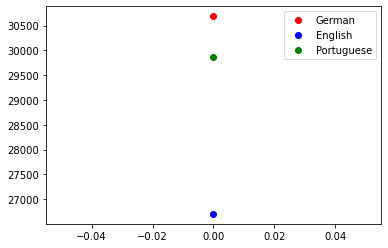

In [165]:
plt.plot(x1,'ro',label=c.iloc[0]["Language"])
plt.plot(x2,'bo',label=c.iloc[1]["Language"])
plt.plot(x3,'go',label=c.iloc[2]["Language"])
plt.legend()

We create a plot for our book stats table where the length of the books is plotted along the horizontal axis and unique words is plotted along the vertical axis.

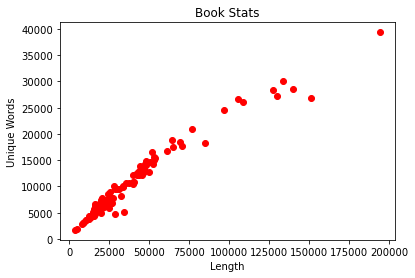

In [171]:
plt.plot(stats.Length,stats.Unique,"ro");
plt.title("Book Stats")
plt.xlabel("Length")
plt.ylabel("Unique Words");

(1000, 100000)

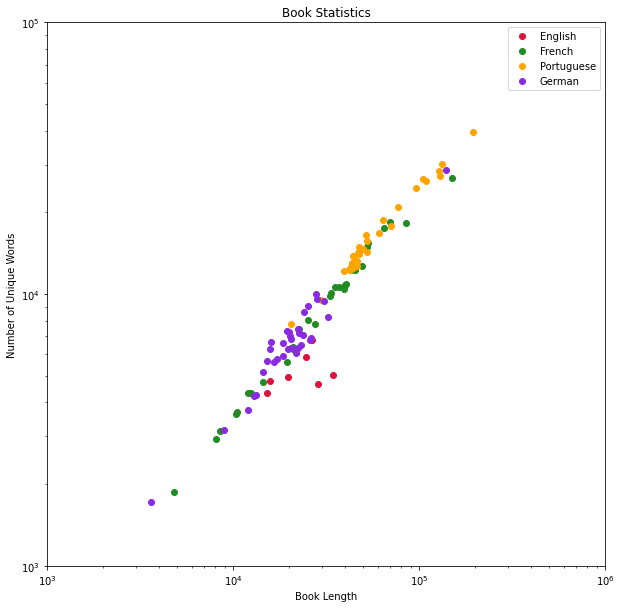

In [189]:
plt.figure(figsize=(10,10))
subset = stats[stats['Language']=="English"]
plt.loglog(subset["Length"],subset["Unique"],"o",color="crimson",label="English");
subset = stats[stats["Language"]=="French"]
plt.loglog(subset["Length"],subset["Unique"],"o",color="forestgreen",label="French");
subset = stats[stats["Language"]=="Portuguese"]
plt.loglog(subset["Length"],subset["Unique"],"o",color="orange",label="Portuguese");
subset = stats[stats["Language"]=="German"]
plt.loglog(subset["Length"],subset["Unique"],"o",color="blueviolet",label="German");
plt.title("Book Statistics");
plt.legend()
plt.xlabel("Book Length")
plt.ylabel("Number of Unique Words")
plt.xlim([10**3,10**6])
plt.ylim([10**3,10**5])

Text(0, 0.5, 'Number of Unique Words')

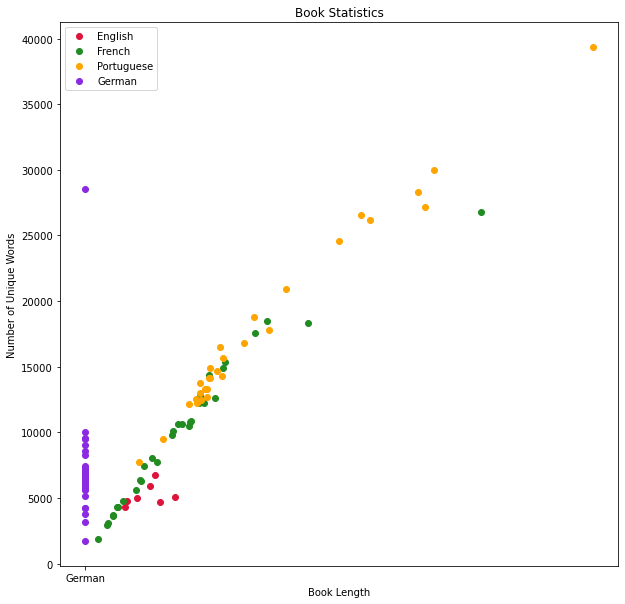

In [183]:
plt.figure(figsize=(10,10))
subset = stats[stats['Language']=="English"]
plt.plot(subset["Length"],subset["Unique"],"o",color="crimson",label="English");
subset = stats[stats["Language"]=="French"]
plt.plot(subset["Length"],subset["Unique"],"o",color="forestgreen",label="French");
subset = stats[stats["Language"]=="Portuguese"]
plt.plot(subset["Length"],subset["Unique"],"o",color="orange",label="Portuguese");
subset = stats[stats["Language"]=="German"]
plt.plot(subset["Language"],subset["Unique"],"o",color="blueviolet",label="German");
plt.title("Book Statistics");
plt.legend()
plt.xlabel("Book Length")
plt.ylabel("Number of Unique Words")